In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-summary/news_summary.csv
/kaggle/input/news-summary/news_summary_more.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
df=pd.read_csv("/kaggle/input/news-summary/news_summary_more.csv")
df.head(10)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
6,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...
7,Govt directs Alok Verma to join work 1 day bef...,Weeks after ex-CBI Director Alok Verma told th...
8,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...


In [5]:
df['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [6]:
df['headlines'][0]

'upGrad learner switches to career in ML & Al with 90% salary hike'

In [7]:
headlines=[]

In [8]:
for i in df['headlines']:
    headlines.append(i)

In [9]:
# headlines

In [10]:
len(headlines)

98401

# As the dataset is very large we will take only first 500 headlines..

# Tokenizing the Text-->

In [11]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(headlines[:500])
total_words=len(tokenizer.word_index)+1
total_words

2495

In [12]:
sequences=[]

In [13]:
# headlines[:500]

In [14]:
len(headlines)

98401

In [15]:
for l in headlines[:5000]:
     token = tokenizer.texts_to_sequences([l])[0]
#      print(token)
     for i in range(1,len(token)):
       ngrams_seq=token[:i+1]
       sequences.append(ngrams_seq)

# So we had know converted the texts to sequences..

In [16]:
# sequences

In [17]:
len(sequences)

30242

In [18]:
maxl=0

In [19]:
for i in sequences:
    k=len(i)
    if k>maxl:
        maxl=k

In [20]:
maxl

16

# So the maximum length among the sequrnces is 16,so this will be our max-padding..

In [21]:
data= pad_sequences(sequences, maxlen=maxl)
data

array([[  0,   0,   0, ...,   0, 755, 756],
       [  0,   0,   0, ..., 755, 756, 757],
       [  0,   0,   0, ..., 756, 757,   1],
       ...,
       [  0,   0,   0, ...,   2,   2,  57],
       [  0,   0,   0, ...,   2,  57,  27],
       [  0,   0,   0, ...,  57,  27, 195]], dtype=int32)

In [22]:
data.shape

(30242, 16)

# SPLITTING PREDICTORS AND LABELS-->
Taking the last word of every sequence as target variable and rest all as the independent variables..So that our neural network will learn accordingly.. So in labels we will be selecting the last column..

In [23]:
predictors=data[:,:-1]
predictors

array([[  0,   0,   0, ...,   0,   0, 755],
       [  0,   0,   0, ...,   0, 755, 756],
       [  0,   0,   0, ..., 755, 756, 757],
       ...,
       [  0,   0,   0, ...,  52,   2,   2],
       [  0,   0,   0, ...,   2,   2,  57],
       [  0,   0,   0, ...,   2,  57,  27]], dtype=int32)

In [24]:
predictors.shape

(30242, 15)

# Selecting the Last Column-->

In [25]:
labels=data[:,-1]
labels

array([756, 757,   1, ...,  57,  27, 195], dtype=int32)

In [26]:
labels.shape

(30242,)

In [27]:
labels=ku.to_categorical(labels,num_classes=total_words)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
labels.shape

(30242, 2495)

In [29]:
model = Sequential()
model.add(Embedding(input_dim=total_words,output_dim=80,input_length=15))#input length is 15 not 16 as we have taken the last column for labels for 16-1=15
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=150,return_sequences=False)))#if return sequences is false,then it will return a 2-D array,if true then it will return a 3-D array..
model.add(Dense(total_words,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 80)            199600    
_________________________________________________________________
dropout (Dropout)            (None, 15, 80)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               277200    
_________________________________________________________________
dense (Dense)                (None, 2495)              750995    
Total params: 1,227,795
Trainable params: 1,227,795
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(predictors, labels, epochs=100, verbose=1)

Train on 30242 samples
Epoch 1/100
30242/30242 [==============================] - 15s 485us/sample - loss: 6.5888 - accuracy: 0.0519
Epoch 2/100
30242/30242 [==============================] - 9s 307us/sample - loss: 6.2329 - accuracy: 0.0686
Epoch 3/100
30242/30242 [==============================] - 9s 309us/sample - loss: 5.9940 - accuracy: 0.0795
Epoch 4/100
30242/30242 [==============================] - 10s 327us/sample - loss: 5.6908 - accuracy: 0.0959
Epoch 5/100
30242/30242 [==============================] - 9s 298us/sample - loss: 5.3639 - accuracy: 0.1118
Epoch 6/100
30242/30242 [==============================] - 9s 302us/sample - loss: 5.0439 - accuracy: 0.1294
Epoch 7/100
30242/30242 [==============================] - 9s 295us/sample - loss: 4.7479 - accuracy: 0.1479
Epoch 8/100
30242/30242 [==============================] - 9s 295us/sample - loss: 4.4690 - accuracy: 0.1719
Epoch 9/100
30242/30242 [==============================] - 9s 306us/sample - loss: 4.2038 - accuracy: 0

30242/30242 [==============================] - 9s 313us/sample - loss: 0.7804 - accuracy: 0.7894
Epoch 76/100
30242/30242 [==============================] - 9s 312us/sample - loss: 0.7827 - accuracy: 0.7877
Epoch 77/100
30242/30242 [==============================] - 9s 308us/sample - loss: 0.7729 - accuracy: 0.7911
Epoch 78/100
30242/30242 [==============================] - 9s 303us/sample - loss: 0.7741 - accuracy: 0.7898
Epoch 79/100
30242/30242 [==============================] - 9s 299us/sample - loss: 0.7701 - accuracy: 0.7890
Epoch 80/100
30242/30242 [==============================] - 9s 305us/sample - loss: 0.7642 - accuracy: 0.7908
Epoch 81/100
30242/30242 [==============================] - 10s 321us/sample - loss: 0.7690 - accuracy: 0.7905
Epoch 82/100
30242/30242 [==============================] - 10s 326us/sample - loss: 0.7588 - accuracy: 0.7927
Epoch 83/100
30242/30242 [==============================] - 9s 310us/sample - loss: 0.7517 - accuracy: 0.7937
Epoch 84/100
30242/30

# Accuracy reached to 80%

Text(0.5, 1.0, 'Training accuracy')

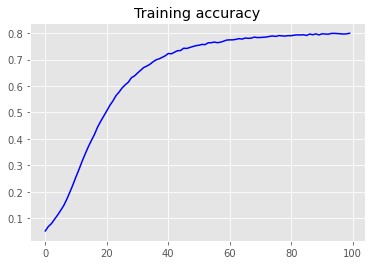

In [38]:
accuracy = history.history['accuracy']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')

Text(0.5, 1.0, 'Training accuracy')

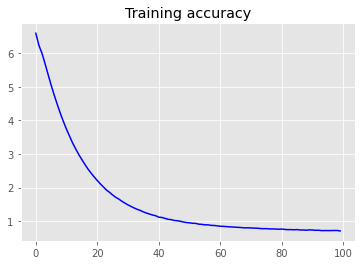

In [39]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training accuracy')
plt.title('Training accuracy')

# Predicting-->

In [35]:
output_word = ""

In [50]:
test_text = "President Donald Trump"
next_words = 5

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	test_text += " " + output_word

In [51]:
print(test_text)

President Donald Trump for 6 days to stop


In [44]:
test_text = "India and China"
next_words = 5

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	test_text += " " + output_word

In [45]:
print(test_text)

India and China for 10 months of wine


In [48]:
test_text = "BCCI"
next_words = 5

for num in range(next_words):
	token = tokenizer.texts_to_sequences([test_text])
	new_pad = pad_sequences(token, maxlen=15)
	predicted = model.predict_classes(new_pad, verbose=0)
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	test_text += " " + output_word

In [49]:
print(test_text)

BCCI to in indian 2 report


# We can see, the model has produced the output which looks fairly fine..

# We can further tune the parameters to increase the model performance..